# DBSCAN and Meanshift

In that problem you were given a datagenerator for 3 datasets, on which you had to compare the performances of MeanShift, K-means,and Spectral Clustering.You are to re-use the data generator given in Homework 1 Problem 8, and now run DBScan on thethree datasets (we want to compare this to MeanShift on the same datasets.  The correspondingPython function DBSCAN is imported as follows:

In [22]:
from  sklearn.cluster  import  DBSCAN
import matplotlib.pyplot as plt
from sklearn . cluster import MeanShift

The DBSCAN function uses two parameters eps and minsamples.  The first parameter eps corresponds  to  the  bandwidth  parameterh,  in  the  course  notes.  The  second  parameter  minsamplesis  proportional  to  the  level λ from  the  course  notes.   More  precisely,  we  have λ=minsamplesVol(B(0,h)).Therefore you first have to make appropriate choices of these parameters as follows.

• Set eps to be20%quantile of interpoint distances when using DBSCAN, i.e., same settingas for MeanShift in Homework 1.

• For  minsamples  in  the  range[100,400,700,1000],  pick  the  smallest  value  that  gives  morethan one cluster

In [23]:
import random
import math
import numpy as np

random . seed ( 0 )
## Data set 1
X1 = []
for i in range ( 1000 ):
    theta = random.uniform (0 , 2* math.pi)
    radius = random.gauss (0, 0.2 )+ random.choice ([1 , 3])
    X1.append([radius * math.cos(theta), radius*math.sin(theta)])
X1 = np.array (X1)

    ## Data Set 2
X2 = []
for i in range ( 1000 ):
    theta = random.uniform (0 , 2* math.pi)
    radius = random.gauss (0 , 0.1 ) + 2
    if theta < math.pi:
        X2.append ([ radius * math . cos( theta )-1 , radius * math . sin( theta )])
    else :
        X2.append ([ radius * math . cos( theta )+1 , radius * math . sin( theta )])
X2 = np.array (X2)

## Data Set 3
X3 = []
for i in range (1000):
    radius = random . gauss (0,1)
    theta = random . uniform (0,2* math.pi)
    center = random . choice ([[0,1],[3 , 3],[1 ,-3]])
    X3.append ([ radius * math . cos( theta )+ center [0], radius * math . sin( theta )+ center
    [1]])
X3 = np . array ( X3 )

In [24]:
from sklearn.cluster import estimate_bandwidth
h1=estimate_bandwidth(X1, quantile=0.2)
h2=estimate_bandwidth(X2, quantile=0.2)
h3=estimate_bandwidth(X3, quantile=0.2)

In [25]:
for i in (100,400,700,1000):
    clustering = DBSCAN(eps=h1, min_samples=i).fit(X1)
    if len(set(clustering.labels_))>1:
        print (i)

400


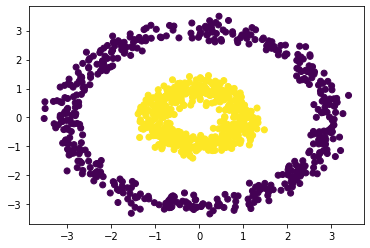

In [26]:
clustering = DBSCAN(eps=h1, min_samples=400).fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=clustering.labels_)

In [27]:
for i in (100,400,700,1000):
    clustering = DBSCAN(eps=h2, min_samples=i).fit(X2)
    if len(set(clustering.labels_))>1:
        print (i)

100


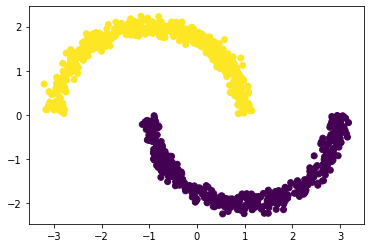

In [28]:
clustering = DBSCAN(eps=h2, min_samples=100).fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=clustering.labels_)

In [29]:
for i in (100,400,700,1000):
    clustering = DBSCAN(eps=h3, min_samples=i).fit(X3)
    if len(set(clustering.labels_))>1:
        print (i)

100


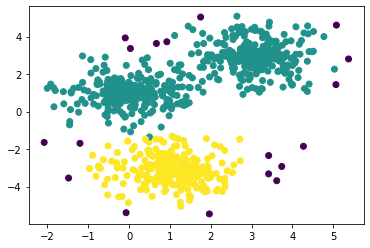

In [30]:
clustering = DBSCAN(eps=h3, min_samples=100).fit(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=clustering.labels_)

(b)  Plot  the  results  of  clustering  using  MeanShift  (with  parameters  set  as  in  Homework  1).  Ifyou results for Homework 1 were correct you can simply provide those again here.

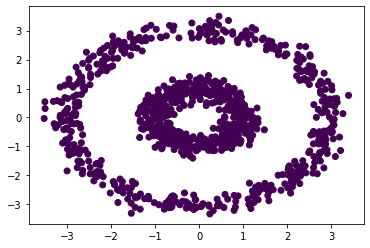

In [31]:
clustering= MeanShift(bandwidth=h1).fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=clustering.labels_)

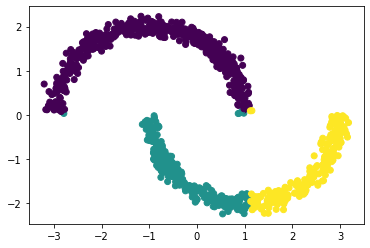

In [32]:
clustering= MeanShift(bandwidth=h2).fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=clustering.labels_)

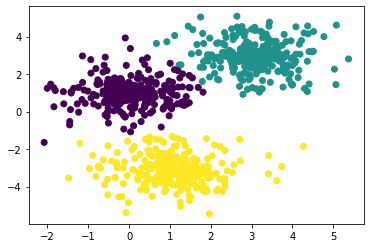

In [33]:
clustering= MeanShift(bandwidth=h3)
labels = clustering.fit_predict(X3) 
plt.scatter(X3[:, 0], X3[:, 1], c=clustering.labels_)

(c)  DBSCAN  should  vastly  outperform  MeanShift  on  at  least  2  of  the  datasets?    Which  2datasets?  Give a simple explanation as to why DBSCAN might do better there.

DBscan outperforms meanshift on first two dataset. The reason could be that the data points in the same clustering is close to each other and two cluster is separate, while in the third graph clusters are close to each other. 

Problem 4:  Compare Adam vs Adagrad

In [44]:
## Code for generator / sampler
import numpy as np
import random
import time
from numpy import linalg as LA
import statistics

# initialization
sigma = 1
d = 10
c_square = 100
cov = np.diag ([( 0.25 ** i )* c_square for i in range (1 , d+1 )])
mean = [0]*d
# coeficient given
w = np.array ([1]*d )

# Sampler function
def sampler ( n ):
    # data X generator
    np.random.seed ( int( time.time ()* 100000 )% 100000 )
    X = np.random.multivariate_normal (mean,cov,n)
    # data Y generator
    Y = np . matmul (X,w)+np.random.normal (0 , sigma ** 2 , n )
    return X, Y

def gradient(x,y,w,n):
    return ((w.T.dot(x)-y)*x*2+0.2*w)

def Adagrad (x,y,d=10,w = np.array ([0]*d)):
    w_star = np.array ([1]*d )
    n=len(x)
    beta=2*(25+0.1)
    t=0
    F=[]
    diff=[]
    
    for t in range(n):
        Ft=gradient(x[t],y[t],w,n)
        F.append(Ft**2)
        ita=np.diag(1/np.sqrt(np.sum(F,axis=0)*beta))
        w=w-ita.dot(Ft)
        diff.append(np.sqrt(np.sum((w-w_star)**2)))
    return diff
    

In [45]:
def Adam(x,y,d=10,w=np.array ([0]*d)):
    w_star = np.array ([1]*d )
    n=len(x)
    beta=2*(25+0.1)
    F=[]
    diff=[]
    
    for t in range(1, n+1):
        Ft=gradient(x[t-1],y[t-1],w,n)
        F.append(Ft**2)
        u= []
        
        for s in range(t):
            u.append((t)*(1.1**(s+1-t))/(11*(1-1.1**(-(t)))))
        
        u=np.diag(u)
        ita=np.diag(1/np.sqrt(np.sum(np.dot(u,F),axis=0)*beta))
        w=w-ita.dot(Ft)
        diff.append(np.sqrt(np.sum((w-w_star)**2)))
        
    return diff

In [46]:
random.seed(0)
AGD=[]
for i in range(10):
    data_ran=sampler(1000)
    X=data_ran[0]
    Y=data_ran[1]
    AGD.append(Adagrad(x=X,y=Y))

AGD_var=np.var(AGD,axis=0)
AGD_mean=np.mean(AGD,axis=0)

In [47]:
random.seed(0)
AD=[]
for i in range(10):
    data_ran=sampler(1000)
    X=data_ran[0]
    Y=data_ran[1]
    AD.append(Adam(x=X,y=Y))

AD_var=np.var(AD,axis=0)
AD_mean=np.mean(AD,axis=0)

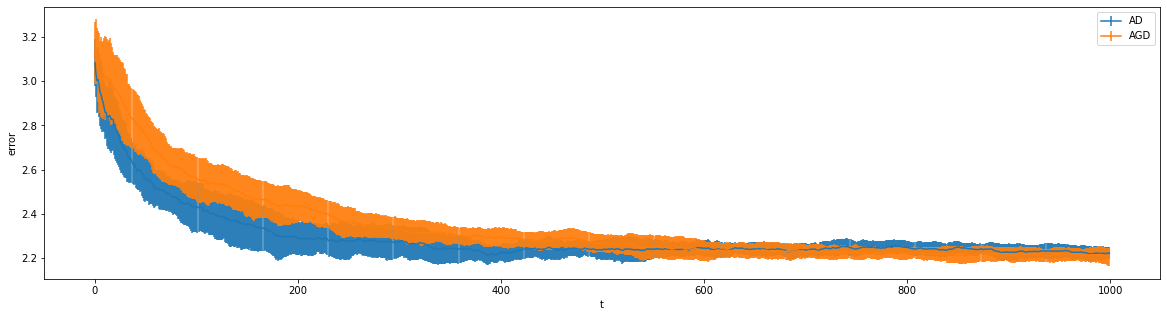

In [49]:
import matplotlib.pyplot as plt

t=range(1000)
plt.figure(figsize=(20,5))
#plt.plot(t,AGD_mean,label='AGD')
#plt.plot(t,AD_mean,label='AD')
plt.errorbar(t,AD_mean,yerr=np.sqrt(AD_var),label='AD')
plt.errorbar(t,AGD_mean,yerr=np.sqrt(AGD_var),label='AGD')
plt.xlabel('t')
plt.ylabel('error')
plt.legend()
plt.show()

Adam is less variated and less error at the begining than AGD and they converge to the same error.

b)  Why should it be the case that Adam’s estimation σ2t,iof the gradient variance terms,  i.e.,through a discounting factor, might be better than that of Adagrad?  In other words, what problem is Adam fixing?  (Try to be clear but brief).

The adam algorithm views delta F(ws) may have different distribution. It views delta F(x_t) as a random draws and evaluate its variance only on close points.

Problem 5:  Bias and Variance

In [2]:
import  random
import  numpy  as np
d = 2
mu0 = [[-2,-3.5],[0,0],[2,-3.5]]
Id = [[25 ,0],[0,25]]
def  Data_Generate(n):
    outX = []
    outY = np.random.choice(list(range(3)),n,replace = True , p = [0.5,0.25,0.25])
    for i in  range(n):
        mu = mu0[outY[i]]
        X = np.random.multivariate_normal(mu ,Id ,1)[0].tolist ()
        outX.append(X)
    return  outX ,outY

In [17]:
from sklearn.neighbors import KNeighborsClassifier
N = 500

error=np.zeros((10,10))
err_mean = []
err_var = []
testX, testY = Data_Generate(N)
k = range(1, 500, 50)

for i in range(10):
    trainX , trainY = Data_Generate(N)
    for j in range(10):
        ENN = KNeighborsClassifier(n_neighbors=k[j])
        ENN.fit(trainX , trainY)
        pre=ENN.predict(testX)
        error[i][j] = np.mean(pre!=testY)
        
err_mean=np.mean(error, axis=0)
err_var=np.var(error, axis=0)

a) if k is n, then n points put into one group and return the most frequent label. Therefore, the output is always the same.

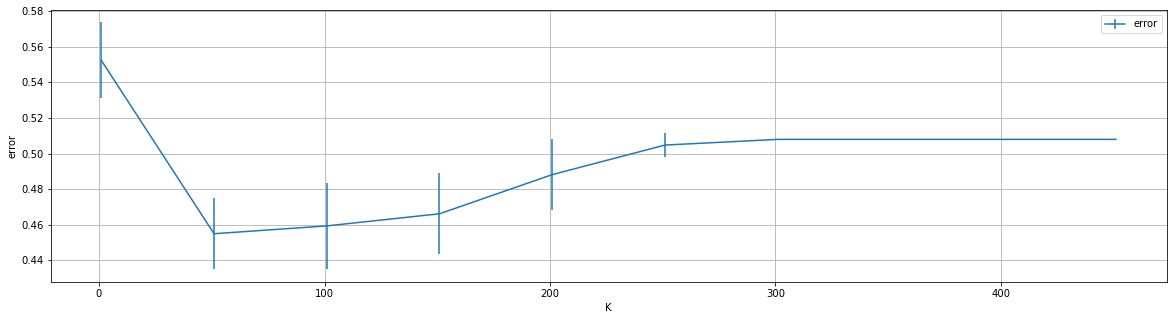

In [18]:
K=range(1, 500, 50)
plt.figure(figsize=(20,5))
plt.errorbar(K,err_mean,yerr=np.sqrt(err_var),label='error')
plt.xlabel('K')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()

(c)  For  which  values  ofkdo  we  observe  higher  variances?   That  is,  for  the  smaller  or  higher values?  Explain why in terms of the ability ofˆfkto fit general functions.

For the smaller value, we observe the higher variance. If the model is too complex, it may overfit the current data, and had higher error to fit future datas. We know that for knn, smaller number is more complex. Therefore, the variance will be higher for smaller number of K. However, when it close to 50, it reaches the optimal number and the variance is relatively smaller than other K.

 (iii)  ,(ii) ,(iii)  